In [62]:
import pandas as pd
from pandas import Series, DataFrame 
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("D:\data-science-project\learning-data-science\health_care\healthcare_dataset.csv")

In [64]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [65]:
df.shape[0]

55500

In [66]:
missing_gender = df['Gender'].isnull().sum()
missing_gender

0

In [67]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [68]:
male_number = df_male.shape[0]
female_number = df_female.shape[0]

In [69]:
male_number + female_number

55500

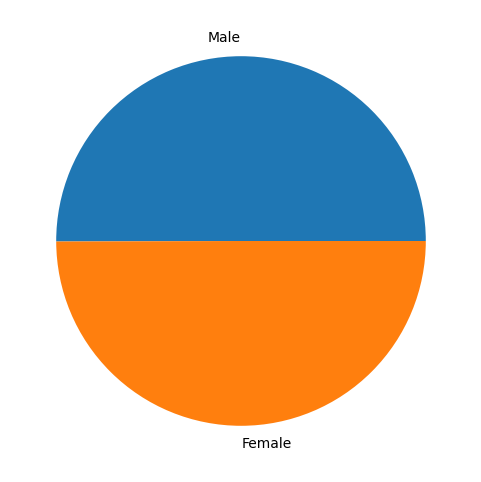

In [70]:
pieChart_data = np.array([male_number, female_number])
pieChart_label = np.array(['Male', 'Female'])
fig = plt.figure(figsize=(6,6))
plt.pie(pieChart_data, labels= pieChart_label)
plt.show()

## Analyzing age
Now we will see the age range, mean, median and mode of the patients

In [71]:
youngest_person_age = df['Age'].min()
yooungest_index = df[df['Age'] == youngest_person_age].index.values
youngest_patient_number = pd.DataFrame(df.loc[yooungest_index, 'Age']).shape[0]


In [72]:
oldest_person_age = df['Age'].max()
oldest_index = df[df['Age'] == oldest_person_age].index.values
oldest_patient_number = pd.DataFrame(df.loc[oldest_index, 'Age']).shape[0]

In [73]:
range_summary = pd.DataFrame({
    'Age' : [youngest_person_age, oldest_person_age],
    'Total Patient': [youngest_patient_number, oldest_patient_number]
})
print('Youngest and Oldest patient:')
range_summary.style.hide()

Youngest and Oldest patient:


Age,Total Patient
13,14
89,8


In [74]:
central_tendency = pd.Series({
    'Mean' : df['Age'].mean(),
    'Median' : df['Age'].median()
})
central_tendency

Mean      51.539459
Median    52.000000
dtype: float64

In [75]:
df['Age'].mode()

0    38
Name: Age, dtype: int64

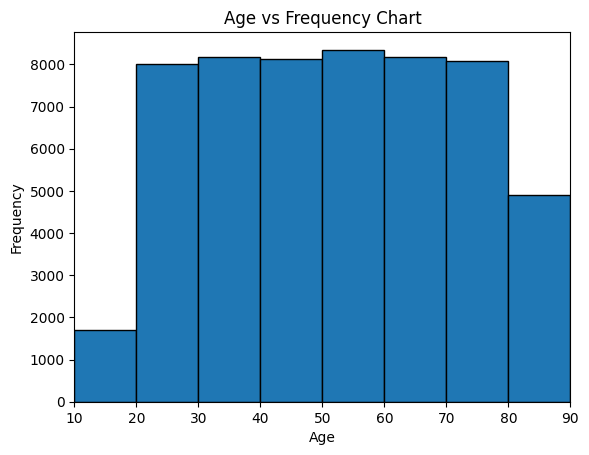

In [76]:
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age vs Frequency Chart')
plt.hist(df['Age'], bins =np.arange(10, 91,10), edgecolor ='black')
plt.xlim(10,90)
plt.show()

## Analyzing Blood Type

Question:
1. Which blood groups are there in the data?
2. Make a barchart and a pie chart.

In [77]:
blood_type = (set(df['Blood Type']))
blood_type

{'A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-'}

In [78]:
a_positive_index = df[df['Blood Type'] == 'A+'].index.values
a_positive_number = pd.DataFrame(df.loc[a_positive_index,'Blood Type']).shape[0]

a_negative_index = df[df['Blood Type'] == 'A-'].index.values
a_negative_number = pd.DataFrame(df.loc[a_negative_index, 'Blood Type']).shape[0]

b_positive_index = df[df['Blood Type'] == 'A+'].index.values
b_positive_number = pd.DataFrame(df.loc[b_positive_index,'Blood Type']).shape[0]

b_negative_index = df[df['Blood Type'] == 'A-'].index.values
b_negative_number = pd.DataFrame(df.loc[b_negative_index, 'Blood Type']).shape[0]

ab_positive_index = df[df['Blood Type'] == 'A+'].index.values
ab_positive_number = pd.DataFrame(df.loc[ab_positive_index,'Blood Type']).shape[0]

ab_negative_index = df[df['Blood Type'] == 'A-'].index.values
ab_negative_number = pd.DataFrame(df.loc[ab_negative_index, 'Blood Type']).shape[0]

o_positive_index = df[df['Blood Type'] == 'A+'].index.values
o_positive_number = pd.DataFrame(df.loc[o_positive_index,'Blood Type']).shape[0]

o_negative_index = df[df['Blood Type'] == 'A-'].index.values
o_negative_number = pd.DataFrame(df.loc[o_negative_index, 'Blood Type']).shape[0]
        

In [79]:
type(a_negative_number)

int

In [80]:
blood_type_series = pd.Series([a_positive_number,a_negative_number,ab_positive_number,ab_negative_number,
                               b_positive_number, b_negative_number, o_positive_number, o_negative_number],
                              index= (blood_type))


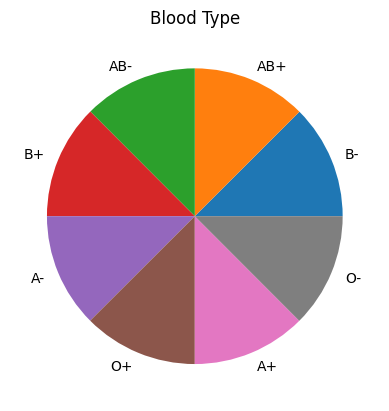

In [81]:
plt.title('Blood Type')
blood_type_series.plot(kind='pie')
# plt.gca().patch.set_color('red')
# plt.gca().patch.set_linewidth(10)
plt.show()

## Analyze Medical Condition
1. Chechk missing data.
2. Find frequency of each medical condition
3. Show using piechart

Note: Use loop

In [82]:
missing_medical_condition = df['Medical Condition'].isnull().sum()
missing_medical_condition

0

In [83]:
medical_condition = list(set(df['Medical Condition']))
medical_condition

['Arthritis', 'Obesity', 'Hypertension', 'Diabetes', 'Asthma', 'Cancer']

In [84]:
# o_negative_index = df[df['Blood Type'] == 'A-'].index.values
# o_negative_number = pd.DataFrame(df.loc[o_negative_index, 'Blood Type']).shape[0]
medical_condition_patient = []

for x in medical_condition:
    medical_condition_index = df[df['Medical Condition'] == x].index.values
    temp = pd.DataFrame(df.loc[medical_condition_index, 'Medical Condition']).shape[0]
    medical_condition_patient.append(temp)
medical_condition_series = pd.Series(medical_condition_patient, index=medical_condition)
medical_condition_series_percentage = medical_condition_series*100/(df.shape[0]) 
medical_condition_series_percentage

Arthritis       16.771171
Obesity         16.632432
Hypertension    16.657658
Diabetes        16.763964
Asthma          16.549550
Cancer          16.625225
dtype: float64

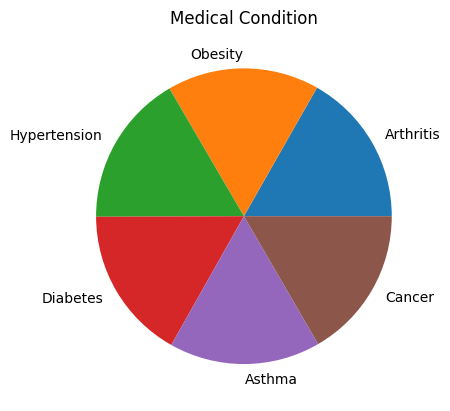

In [85]:
plt.title('Medical Condition')
medical_condition_series.plot(kind= 'pie')
plt.show()

## Analyze Insurance Provider

In [86]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [87]:
insurance_provider = list(set(df['Insurance Provider']))
insurance_provider_count = []

In [88]:
for x in insurance_provider:
    insurance_index = df[df['Insurance Provider'] == x].index.values
    temp = pd.DataFrame(df.loc[insurance_index, 'Insurance Provider']).shape[0]
    insurance_provider_count.append(temp)

insurance_series = pd.Series(insurance_provider_count, index=insurance_provider)


<Axes: title={'center': 'Insurance Provider'}>

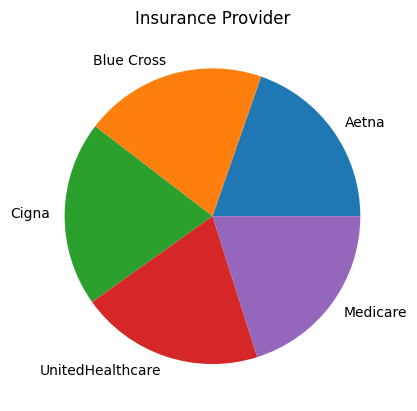

In [89]:
plt.title('Insurance Provider')
insurance_series.plot(kind='pie')

## Analyze Admission Type, Medication and Test Result
Note: Use function

In [90]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [91]:
def analyzer(feature,data_frame):
    feature_catagory = list(set(data_frame[feature]))
    feature_count = []
    for x in feature_catagory:
        feature_index = data_frame[data_frame[feature] == x].index.values
        temp = pd.DataFrame(data_frame.loc[feature_index, feature]).shape[0]
        feature_count.append(temp)
    
    feature_series = pd.Series(feature_count, feature_catagory)
    return feature_series
  

def visualization(feature,feature_series):
    plt.title(feature)
    feature_series.plot(kind = 'pie')
    plt.show()

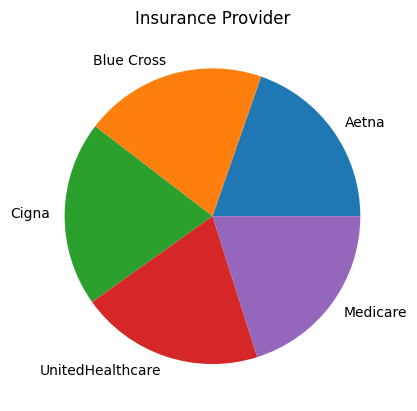

In [92]:
# Check the function using Insurance provider feature

check_insurence_series = analyzer('Insurance Provider',df)
visualization('Insurance Provider', check_insurence_series)